## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix, r2_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings("ignore")


## Loading the Dataset

In [3]:
# Read in the 'flights.csv' file and store it in a pandas DataFrame called 'flightdata'
# Set 'low_memory' parameter to False to prevent warning messages about mixed data types in the columns
flightdata = pd.read_csv('flights.csv')

# Print the 'flightdata' DataFrame to the console
#flightdata

In [4]:
# Select the first 450,000 rows from the 'flightdata' DataFrame using indexing for training
# Select the first 450,000 rows from the 'flightdata' DataFrame using indexing for Testing

trainingflightdata = flightdata[0:450000]
testingflightdata = flightdata[1050001:1069000]
#trainingflightdata.head(5)


In [5]:
# Display information about the 'flightsdata' DataFrame using the 'info()' method
# This method provides a summary of the DataFrame's column names, number of non-null values, and data types
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
flightdata.isnull().values.any()

True

In [7]:
# Check if there are any missing values in the 'flightdata' DataFrame using the 'isnull()' method
flightdata.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

## Data Visualization

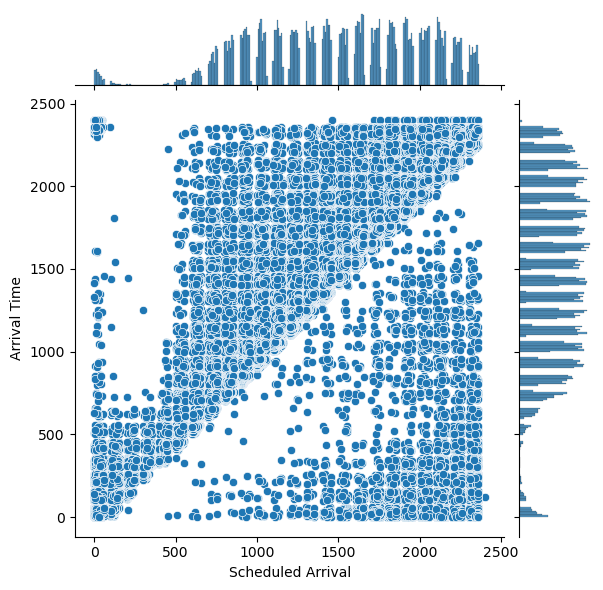

In [8]:
# Create a joint plot of scheduled arrival time vs. actual arrival time in the 'flightdata' DataFrame
sns.jointplot(data=flightdata, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")
# Set the y-axis label to 'Flights Cancelled'
plt.ylabel('Arrival Time')

# Set the x-axis label to 'Cancellation Reason'
plt.xlabel('Scheduled Arrival')

plt.show()

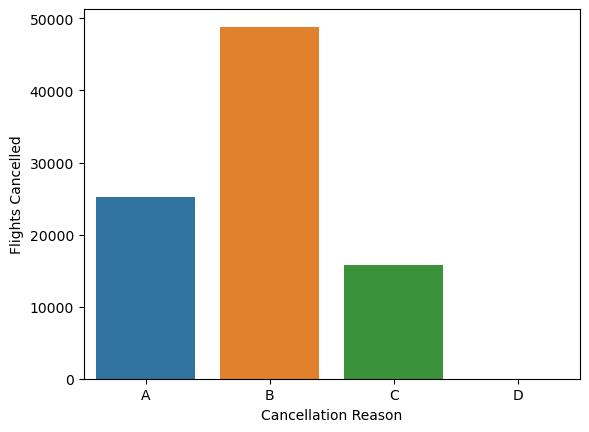

In [9]:
# Create a countplot of the 'CANCELLATION_REASON' column
sns.countplot(x='CANCELLATION_REASON', data=flightdata)

# Set the y-axis label to 'Flights Cancelled'
plt.ylabel('Flights Cancelled')

# Set the x-axis label to 'Cancellation Reason'
plt.xlabel('Cancellation Reason')
plt.show()

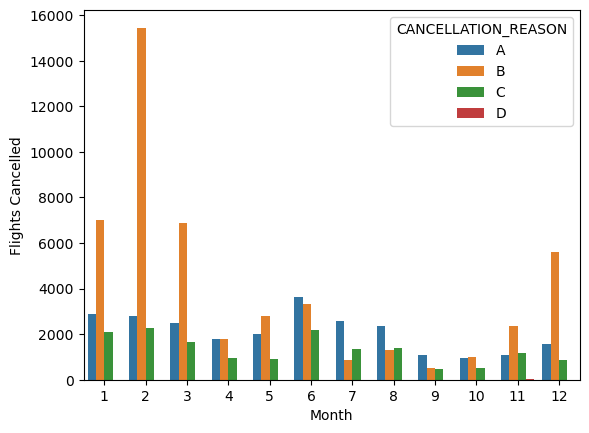

In [10]:
# Create a countplot of the 'MONTH' column in the 'flightdata' DataFrame, using the 'CANCELLATION_REASON' column as the hue
# The 'hue' parameter allows us to visualize the distribution of cancellation reasons for each month
sns.countplot(x="MONTH", hue="CANCELLATION_REASON", data=flightdata)

# Set the y-axis label to 'Flights Cancelled'
plt.ylabel('Flights Cancelled')

# Set the x-axis label to 'Month'
plt.xlabel('Month')
plt.show()

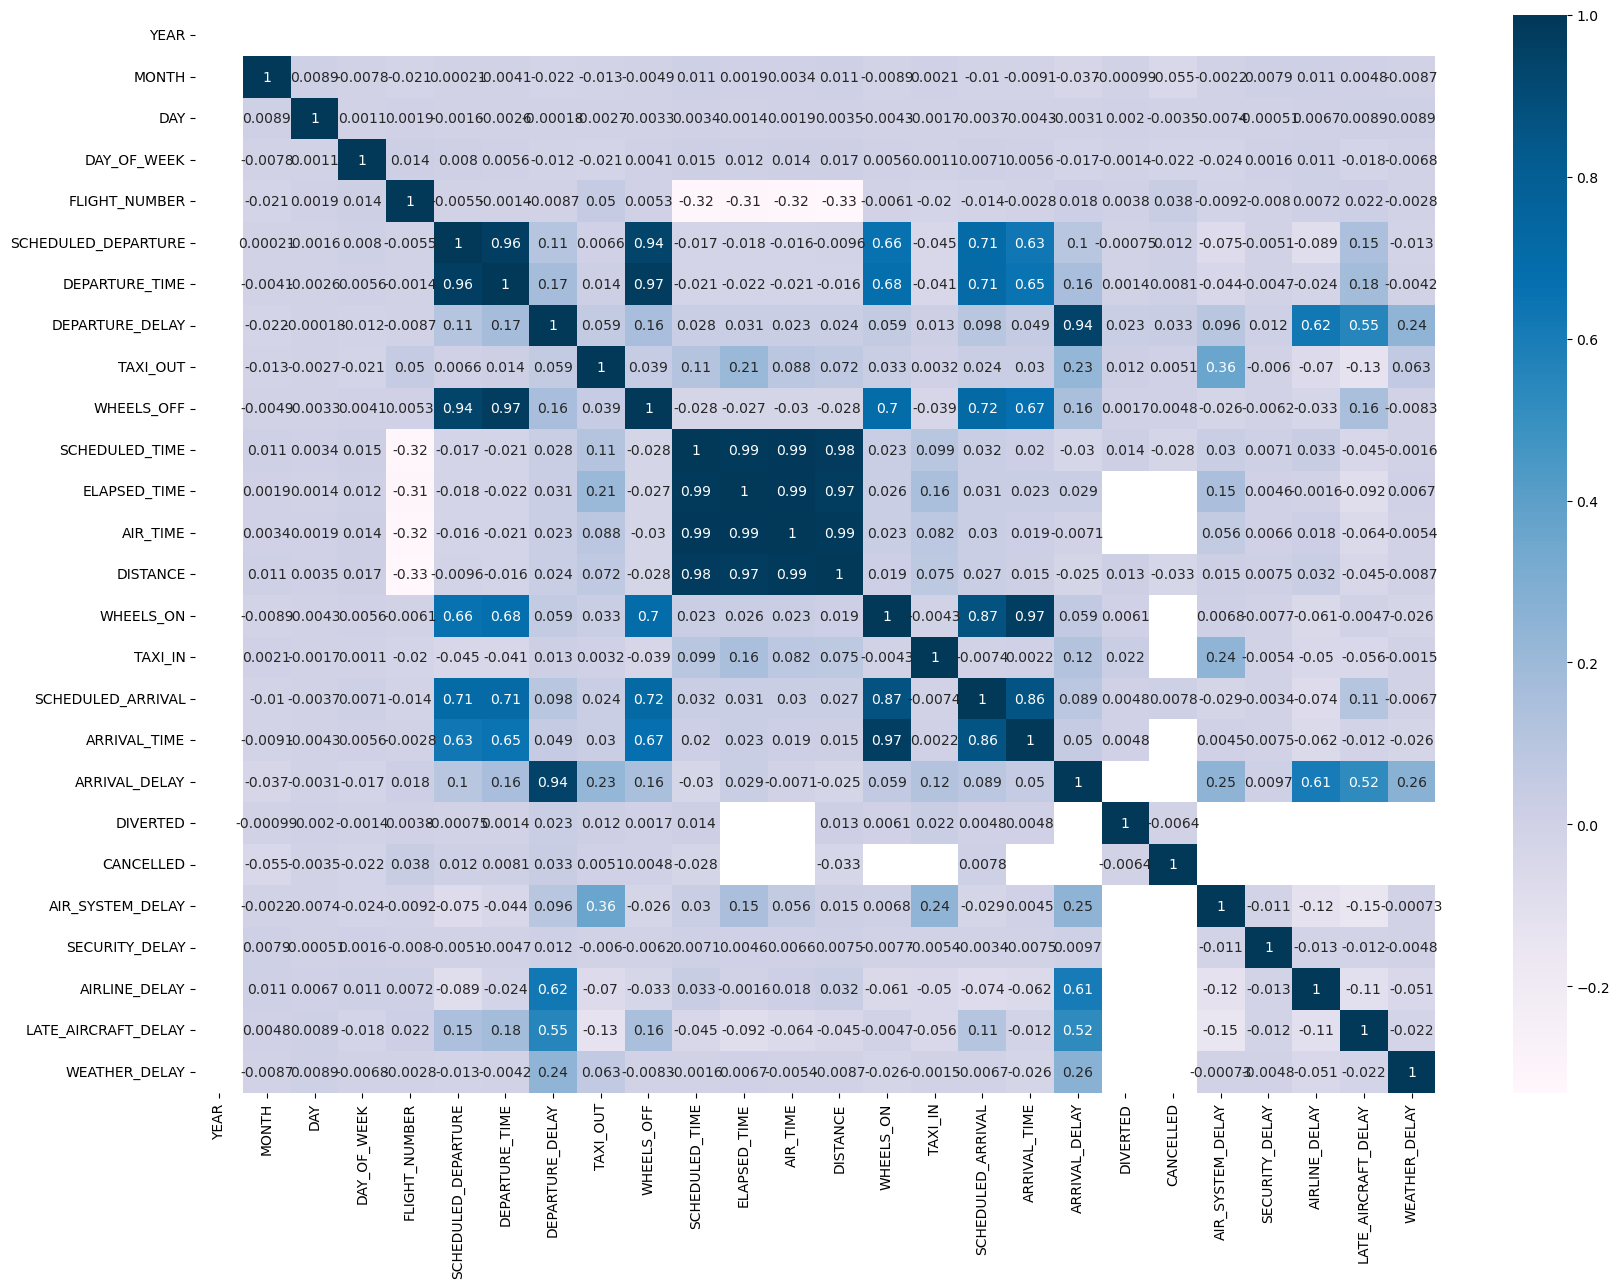

In [11]:
# Create a subplot with the specified figure size
fig, axis = plt.subplots(figsize=(20, 14))

# Create a heatmap of the correlation matrix in the 'flightdata' DataFrame
# The 'annot' parameter adds numerical annotations to the heatmap
sns.heatmap(flightdata.corr(), annot=True, ax=axis, cmap='PuBu')

# Display the plot
plt.show()

In [12]:
corr = flightdata.corr() 
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,...,-0.010121,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,...,-0.003688,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,...,0.007092,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,...,-0.013947,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,...,0.706237,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,...,0.710223,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,...,0.097566,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,...,0.024384,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,...,0.721877,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338


## Data Preprocessing

In [13]:
# filtering out unnecessary columns
trainingflightdata=trainingflightdata.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

testingflightdata=testingflightdata.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

#trainingflightdata

In [14]:
print(trainingflightdata.columns)

print(testingflightdata.columns)


Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [15]:
# replacing all NaN values with the mean of the attribute in which they are present
trainingflightdata=trainingflightdata.fillna(trainingflightdata.mean())

In [16]:
testingflightdata=testingflightdata.fillna(testingflightdata.mean())

In [17]:
# creating a new column; it will tell if the flight was delayed or not
result=[]
for row in trainingflightdata['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

trainingflightdata['result'] = result
trainingflightdata

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,1,30,SAN,DFW,1327,-2.0,1820,1809.0,-11.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0
449996,1,30,GEG,SLC,1327,99.0,1601,1743.0,102.0,0,0,3.000000,0.000000,0.000000,99.000000,0.000000,1
449997,1,30,MAF,IAH,1327,27.0,1455,1512.0,17.0,0,0,17.000000,0.000000,0.000000,0.000000,0.000000,1
449998,1,30,ATL,ORD,1327,-7.0,1435,1421.0,-14.0,0,0,13.323444,0.071608,17.836106,22.669479,2.771435,0


In [18]:
# creating a new column; it will tell if the flight was delayed or not
result=[]
for row in testingflightdata['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

testingflightdata['result'] = result
testingflightdata

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
1050001,3,10,ATL,STL,1139,-1.0,1215,1207.0,-8.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1050002,3,10,EWR,TPA,1139,0.0,1436,1421.0,-15.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1050003,3,10,ELM,DTW,1139,158.0,1300,1534.0,154.0,0,0,0.000000,0.00000,0.000000,154.000000,0.00000,1
1050004,3,10,LBB,DFW,1139,13.0,1245,1305.0,20.0,0,0,7.000000,0.00000,8.000000,5.000000,0.00000,1
1050005,3,10,PSP,LAX,1139,42.0,1238,1303.0,25.0,0,0,0.000000,0.00000,0.000000,25.000000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068995,3,11,ATL,RSW,1405,0.0,1550,1542.0,-8.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068996,3,11,ATL,CLE,1405,0.0,1550,1536.0,-14.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068997,3,11,SAT,SLC,1405,-2.0,1604,1549.0,-15.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068998,3,11,ORD,EWR,1405,3.0,1715,1717.0,2.0,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0


In [19]:
trainingflightdata.value_counts('result')

result
0    360868
1     89132
dtype: int64

In [20]:
print(trainingflightdata.columns)

print(testingflightdata.columns)


Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'result'],
      dtype='object')
Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'result'],
      dtype='object')


In [21]:
# removing some more columns
trainingflightdata=trainingflightdata.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)

testingflightdata=testingflightdata.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)

In [22]:
trainingflightdata.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

In [23]:
testingflightdata.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

In [55]:
testingflightdata

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
1050001,3,10,1139,-1.0,1215,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1050002,3,10,1139,0.0,1436,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1050003,3,10,1139,158.0,1300,0,0,0.000000,0.00000,0.000000,154.000000,0.00000,1
1050004,3,10,1139,13.0,1245,0,0,7.000000,0.00000,8.000000,5.000000,0.00000,1
1050005,3,10,1139,42.0,1238,0,0,0.000000,0.00000,0.000000,25.000000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068995,3,11,1405,0.0,1550,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068996,3,11,1405,0.0,1550,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068997,3,11,1405,-2.0,1604,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0
1068998,3,11,1405,3.0,1715,0,0,9.628561,0.15723,17.965741,21.192571,2.93004,0


## <center> Splitting Data for Training and Testing

### Assiging X, Y, X1, Y1

In [24]:
data = trainingflightdata.values
X = data[:, :-1]
Y = data[:, -1]


In [25]:
data1 = testingflightdata.values
X1 = data1[:, :-1]
Y1 = data1[:, -1]


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=101)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## <center> Decision Tree Modeling

### Decision Tree Training 

In [28]:
DTclf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=101)
DTclf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)

In [29]:
Y_pred = DTclf.predict(X_test)


In [30]:
print("Decision Tree Training Accuracy score:", format(accuracy_score(Y_test, Y_pred)*100, '.2f'), "%")

Decision Tree Training Accuracy score: 99.22 %


### Decision Tree Confusion Matrix - Training Model

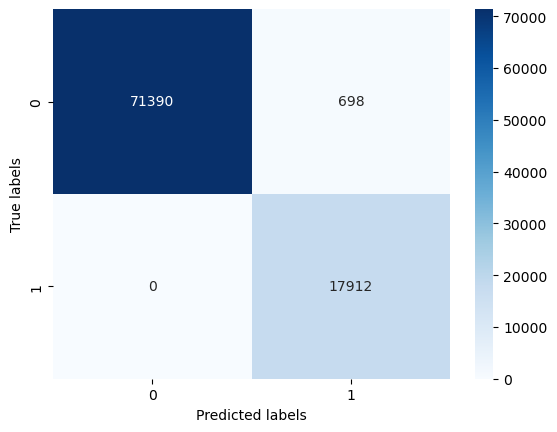

In [31]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [32]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 17912
TN (True Negative): 71390
FP (False Positive): 698
FN (False Negative): 0


### Decision Tree Testing

In [33]:


# Use the trained Decision Tree model to predict the target variable for X1
Y_pred = DTclf.predict(X1)


print("Decision Tree Testing Accuracy score:", format(accuracy_score(Y1, Y_pred)*100, '.2f'), "%")


Testing Accuracy score: 86.14 %


### Decision Tree Confusion Matrix - Testing Model

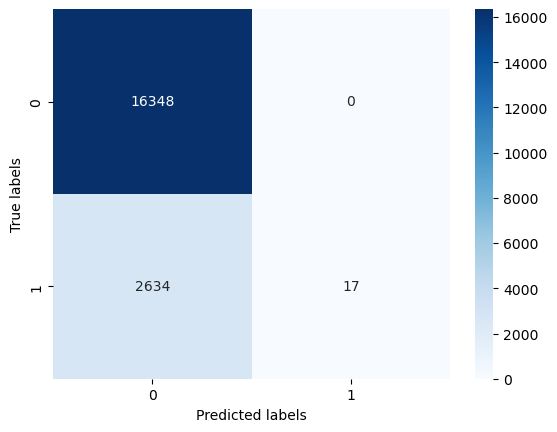

In [34]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [35]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)



TP (True Positive): 17
TN (True Negative): 16348
FP (False Positive): 0
FN (False Negative): 2634


## <center> Random Forest Modeling

### Random Forest Training 

In [36]:
# Create a Random Forest classifier
RFclf = RandomForestClassifier(random_state=42)

# Train the model on the training data
RFclf.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = RFclf.predict(X_test)

print("Random Forest Training Accuracy Score:", format(accuracy_score(Y_test, Y_pred)*100, '.2f'), "%")


Random Forest Training Accuracy Score: 99.88 %


### Random Forest Confusion Matrix - Training Model

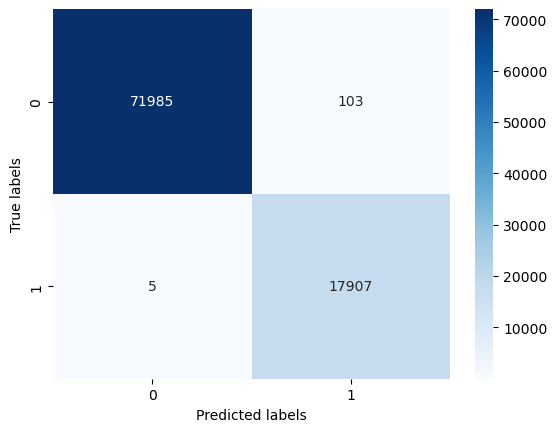

In [37]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [38]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 17907
TN (True Negative): 71985
FP (False Positive): 103
FN (False Negative): 5


### Random Forest Testing 

In [39]:
Y_pred = RFclf.predict(X1)

print("Random Forest Testing Accuracy score:", format(accuracy_score(Y1, Y_pred)*100, '.2f'), "%")


Random Forest Testing Accuracy score: 65.46 %


### Random Forest Confusion Matrix - Testing Model

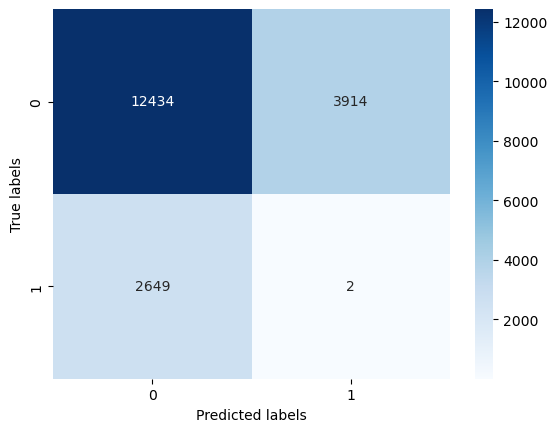

In [40]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [41]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)
# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 2
TN (True Negative): 12434
FP (False Positive): 3914
FN (False Negative): 2649


## <center> Logistic Regression Modeling

### Logistic Regression Training Model

In [42]:
# Create a Logistic Regression classifier
LRclf = LogisticRegression(random_state=42)

# Train the model on the training data
LRclf.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = LRclf.predict(X_test)

print("Logistic Regression Training Accuracy score:", format(accuracy_score(Y_test, Y_pred)*100, '.2f'), "%")


Logistic Regression Training Accuracy score: 98.83 %


### Logistic Regression Confusion Matrix - Training Model

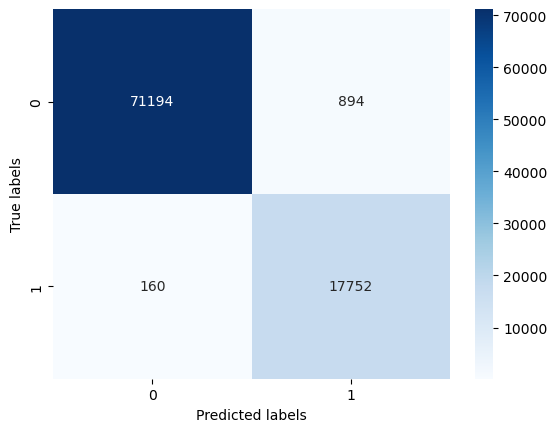

In [43]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [44]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 17752
TN (True Negative): 71194
FP (False Positive): 894
FN (False Negative): 160


### Logistic Regression Testing Model

In [45]:
Y_pred = LRclf.predict(X1)

print("Logistic Regression Testing Accuracy score:", format(accuracy_score(Y1, Y_pred)*100, '.2f'), "%")


Logistic Regression Testing Accuracy score: 94.04 %


### Logistic Regression Confusion Matrix - Testing Model

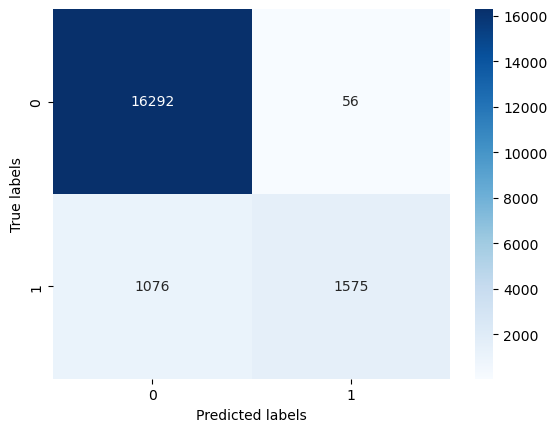

In [46]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [47]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 1575
TN (True Negative): 16292
FP (False Positive): 56
FN (False Negative): 1076


## <center> Linear Regression Modeling

In [48]:
# Train the model on the training data
reg = LinearRegression()
reg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = reg.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(Y_test, Y_pred)
print("R^2 score:", r2*100)

R^2 score: 76.32944063096848


In [49]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse*100)

Root Mean Squared Error: 19.425190193813304


-------

## <center> SVM Classifier Modeling

### SVM Classifier Training Model

In [72]:
# Create a Support Vector Machine Classifier
svm = SVC(random_state=42)

# Train the model on the training data
svm.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = svm.predict(X_test)

# Compute the accuracy score and classification report
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print("SVM Classifier Training Accuracy score:", format(accuracy*100, '.2f'), "%")

SVM Classifier Accuracy score: 99.21 %


### SVM Classifier Confusion matrix – Training Model

In [78]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 17910
TN (True Negative): 72082
FP (False Positive): 6
FN (False Negative): 2


### SVM Classifier Testing Model

In [74]:
# Make predictions on the testing data
Y_pred = svm.predict(X1)

# Compute the accuracy score and classification report
accuracy = accuracy_score(Y1, Y_pred)
report = classification_report(Y1, Y_pred)

print("SVM Classifier Testing Accuracy score:", format(accuracy*100, '.2f'), "%")

SVM Classifier Testing Accuracy score: 13.95 %


### SVM Classifier Confusion matrix – Testing Model

In [75]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)
# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 2651
TN (True Negative): 0
FP (False Positive): 16348
FN (False Negative): 0


## <Center> Neural Network Modeling

In [76]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the training data
train_score = model.evaluate(X_train, Y_train)
# Evaluate the model on the testing data
test_score = model.evaluate(X_test, Y_test)

print("Neural Network Training Accuracy score:", format(train_score[1]*100, '.2f'), "%")
print("Neural Network Testing Accuracy score:", format(test_score[1]*100, '.2f'), "%")


Epoch 1/100
10125/10125 [==============================] - 10s 966us/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0.0119 - val_accuracy: 0.9937
Epoch 2/100
10125/10125 [==============================] - 10s 948us/step - loss: 0.0102 - accuracy: 0.9955 - val_loss: 0.0066 - val_accuracy: 0.9974
Epoch 3/100
10125/10125 [==============================] - 9s 931us/step - loss: 0.0079 - accuracy: 0.9966 - val_loss: 0.0055 - val_accuracy: 0.9979
Epoch 4/100
10125/10125 [==============================] - 10s 955us/step - loss: 0.0070 - accuracy: 0.9970 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 5/100
10125/10125 [==============================] - 10s 939us/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.0053 - val_accuracy: 0.9979
Epoch 6/100
10125/10125 [==============================] - 10s 948us/step - loss: 0.0065 - accuracy: 0.9973 - val_loss: 0.0049 - val_accuracy: 0.9978
Epoch 7/100
10125/10125 [==============================] - 10s 950us/step - loss: 0.0061 - accuracy: 

## <center> K-Nearest Neighbors (KNN) Modeling

In [61]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = knn.predict(X_test)

# Print the accuracy score
print("KNN Training Accuracy score:", format(accuracy_score(Y_test, Y_pred)*100, '.2f'), "%")



KNN Training Accuracy score: 99.29 %


In [65]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 17720
TN (True Negative): 71639
FP (False Positive): 449
FN (False Negative): 192


In [58]:
# Make predictions on new data
Y_pred = knn.predict(X1)

# Print the accuracy score on new data
print("KNN Testing Accuracy score:", format(accuracy_score(Y1, Y_pred)*100, '.2f'), "%")


KNN Testing Accuracy score: 82.96 %


In [59]:
# Create the confusion matrix
cm = confusion_matrix(Y1, Y_pred)
# Assign values to labels
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print labels with corresponding values
print('TP (True Positive):', TP)
print('TN (True Negative):', TN)
print('FP (False Positive):', FP)
print('FN (False Negative):', FN)


TP (True Positive): 2324
TN (True Negative): 13438
FP (False Positive): 2910
FN (False Negative): 327
